In [1]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np
%matplotlib inline

In [2]:
request = SwarmRequest()
request.set_collection("SW_OPER_IBIATMS_2F")
request.set_products(measurements=request.available_measurements("IBI"))
data = request.get_between(
    dt.datetime(2016,1,1,9,7),
    dt.datetime(2016,1,1,9,10)
)

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.096MB)


In [3]:
df = data.as_dataframe()
df.head()

,Spacecraft,Latitude,Longitude,Radius,Bubble_Index,Bubble_Probability,Flags_Bubble,Flags_F,Flags_B,Flags_q
2016-01-01 09:07:00,A,-16.923659,-52.119907,6830079.62,0,0.0,0,1,0,5
2016-01-01 09:07:01,A,-16.987667,-52.120848,6830087.28,0,0.0,0,1,0,5
2016-01-01 09:07:02,A,-17.051675,-52.121786,6830094.93,0,0.0,0,1,0,5
2016-01-01 09:07:03,A,-17.115682,-52.122722,6830102.57,0,0.0,0,1,0,5
2016-01-01 09:07:04,A,-17.179689,-52.123656,6830110.21,0,0.0,0,1,0,5


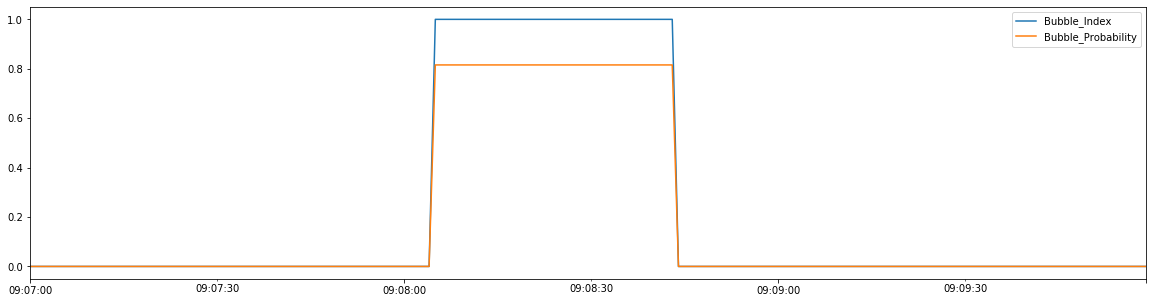

In [4]:
df.plot(y=["Bubble_Index", "Bubble_Probability"], figsize=(20,5));